# Importing Required Libraries & Datasets

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [264]:
sns.set(rc={'figure.figsize':(15,10)})
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

In [265]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [266]:
original_csv_file_shape = raw_data.shape

# ==> 1. Cleaning Data <==

### 1.1 Finding Columns With All Null Values

In [267]:
more_than_50_percent = raw_data.isnull().sum()/len(raw_data)*100
more_than_50_percent.sort_values(ascending=False)

total_il_high_credit_limit        100.000000
mo_sin_old_rev_tl_op              100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_a

##### We can safely drop the columns which have missing values more than 50%

In [268]:
raw_data = raw_data.drop(more_than_50_percent[more_than_50_percent > 50].index, axis=1)

In [269]:
(raw_data.isnull().sum()/len(raw_data)*100).sort_values(ascending=False).head(20)

desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
loan_amnt                      0.000000
purpose                        0.000000
funded_amnt                    0.000000
url                            0.000000
funded_amnt_inv                0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
dtype: float64

### 1.2 From the above numbers, lets start analysing each column which has missing value.

#### 1.2.1 Describe: On carefully reading the describe column, we can infer that, values in that column are some what representing the same as that of purpose column. And since purpose column has no null value, we can go ahead by dropping desc column

In [270]:
raw_data = raw_data.drop(columns=['desc'])

#### 1.2.2 Employee Title: This column contains the information on job titles of people who have applied for loan, this could be usefull. We should not remove column, instead we can drop the missing values.

In [271]:
raw_data = raw_data[~raw_data.emp_title.isnull()]

#### 1.2.3 Employee Length: This column consists of information on professional experiance of employee and this could be useful parameter. We should not remove this column, instead we can drop the missing values.

In [272]:
raw_data = raw_data[~raw_data.emp_length.isnull()]

#### 1.2.4 Public Record Bankruptcies: This column consists of data related to bankruptcy. Though small, it can be decisive factor, hence dropping the missing rows.

In [273]:
raw_data = raw_data[~raw_data.pub_rec_bankruptcies.isnull()]

#### 1.2.5 Last Month Payment Done: Dropping the rows with missing values, as missing value percentage is negligible

In [274]:
raw_data = raw_data[~raw_data.last_pymnt_d.isnull()]

#### 1.2.6 Revolving Line Utilization Rate: Dropping the rows with missing values, as missing value percentage is negligible

In [275]:
raw_data = raw_data[~raw_data.revol_util.isnull()]

#### 1.2.7 Loan Title: Dropping the rows with missing values, as missing value percentage is negligible

In [276]:
raw_data = raw_data[~raw_data.title.isnull()]

#### 1.2.8 Recent Month LC pulled: Dropping the rows with missing values, as missing value percentage is negligible

In [277]:
raw_data = raw_data[~raw_data.last_credit_pull_d.isnull()]

#### 1.2.9 Other Columns

In [278]:
raw_data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [279]:
raw_data.chargeoff_within_12_mths.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [280]:
raw_data.collections_12_mths_ex_med.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

##### This columns have all the values as zero so this column is of no use, lets remove this column.

In [281]:
raw_data = raw_data.drop(columns=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1)

### 1.4 Payment Plan Column consists of only one value i.e. 'n', so we can drop the same

In [282]:
raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.5 Initial List Status Column consists of only one value i.e. 'f', so we can drop the same

In [283]:
raw_data = raw_data.drop(columns=['initial_list_status'])

### 1.6 Policy Code Column consists of only one value i.e. 1, so we can drop the same

In [284]:
raw_data = raw_data.drop(columns=['policy_code'])

### 1.7 Application Type consists of only one value i.e. 'INDIVIDUAL', so we can drop the same

In [285]:
raw_data = raw_data.drop(columns=['application_type'])

### 1.8 The number of accounts on which the borrower is now delinquent & past-due amount owed column consists of only one value, so we can drop the same

In [286]:
raw_data = raw_data.drop(columns=['acc_now_delinq','delinq_amnt'])

### 1.9 Analysing Dataframe after dropping Rows & Columns

In [287]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-raw_data.shape[0]/original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 8.27 %


In [288]:
print('Percentage of Columns removed for entire Raw CSV File accounts to', round((1-raw_data.shape[1]/original_csv_file_shape[1])*100, 2), '%')

Percentage of Columns removed for entire Raw CSV File accounts to 60.91 %


# ==> 2. Formating Data In Columns <==

### This step involves formatting data and converting them into respective formats and creating new categorical columns (if required) which can be easily considered for quick calculations.

### 2.1 Formatting Funded Amount Column Into Funding Category

In [289]:
raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

### 2.2 Formatting Loan Term Column

In [290]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [291]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 2.3 Formatting Interest Column to Float Value & also creating new categorical variable

In [292]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

In [293]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [294]:
raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

### 2.4 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [295]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [296]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [297]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 2.5 Formatting Employee Length (Years of Experience) Column

In [298]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [299]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 2.6 Formatting Ownership Column (Creating new mapped column)

In [300]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [301]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

In [302]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 2.7 Formatting Annual Income / Salary Column (Creating new mapped column)

In [303]:
raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/50000.00) * 50000)

### 2.8 Formatting Salary Verification Column (Creating new mapped column)

In [304]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [305]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [306]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 2.9 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [307]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [308]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [309]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

##### Note: After reaching proper solution, if column by name 'issue_d' is not required, kinldy drop that column here

In [310]:
# raw_data = raw_data.drop(columns = ['issue_d'])

### 2.10 Formatting Loan Status Column (Creating new mapped column)

In [311]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [312]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [313]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 2.11 Formatting Purpose Column

In [314]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 2.12 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [315]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [316]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 2.13 Creating DTI Category Column

In [317]:
raw_data['dti_category'] = raw_data['dti'].apply(lambda x: math.ceil(x))

### 2.14 Formatting Earliest Credit Line Column to Valid Date object

In [318]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [319]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [320]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

##### Note: After reaching proper solution, if column by name 'earliest_cr_line_year' is not required, kinldy drop that column here

In [321]:
# raw_data = raw_data.drop(columns = ['earliest_cr_line_year'])

In [322]:
def clean_months_since_last_column(row):
    if type(row) == str:
        return np.nan
    else:
        return float(row)

### 2.15 Creating Categorical Column For Revolving Balance

In [323]:
raw_data['revol_bal_category'] = raw_data['revol_bal'].apply(lambda x: math.ceil(x/2000.00) * 2000)

### 2.16 Cleaning Revolving Utlization Percent Column & Creating Categorical Column For the same.

In [324]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [325]:
raw_data['revol_util_category'] = raw_data['revol_util'].apply(lambda x: (math.ceil(x/10.00) * 10) if not np.isnan(x) else np.nan)

### 2.17 Categorizing Total Number of Credit Lines column

In [326]:
raw_data['total_acc_category'] = raw_data['total_acc'].apply(lambda x: math.ceil(x/5.00) * 5)

### 2.18 Categorizing Remaining outstanding principal column

In [327]:
raw_data['out_prncp_category'] = raw_data['out_prncp'].apply(lambda x: math.ceil(x/100.00) * 100)

### 2.19 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [328]:
raw_data['out_prncp_inv_category'] = raw_data['out_prncp_inv'].apply(lambda x: math.ceil(x/100.00) * 100)

### 2.20 Formatting Last Payment & Last Credit Pull Date Column to Valid format

In [329]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [330]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 2.21 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [331]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [332]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

# ==> 3. Comparing Data Between Charged Off & Fully Paid Customers <==

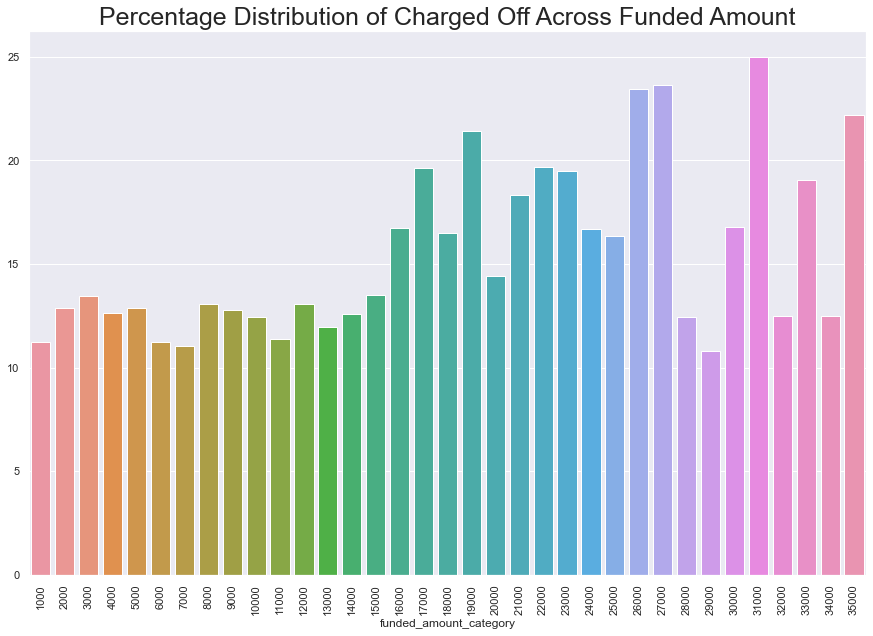

In [333]:
plot_this = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Funded Amount", fontdict={'fontsize': 25})
plt.show()
# plot_this

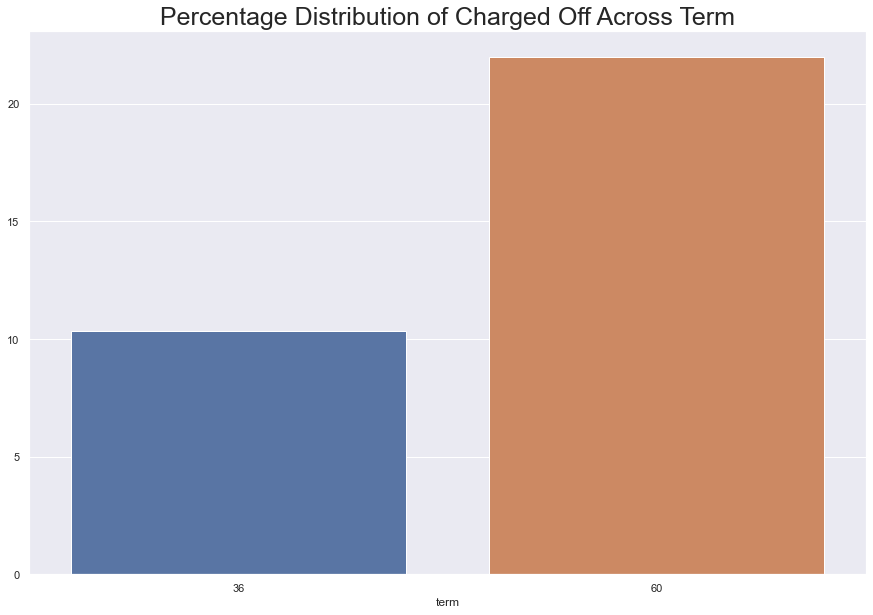

In [334]:
plot_this = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Term", fontdict={'fontsize': 25})
plt.show()
# plot_this

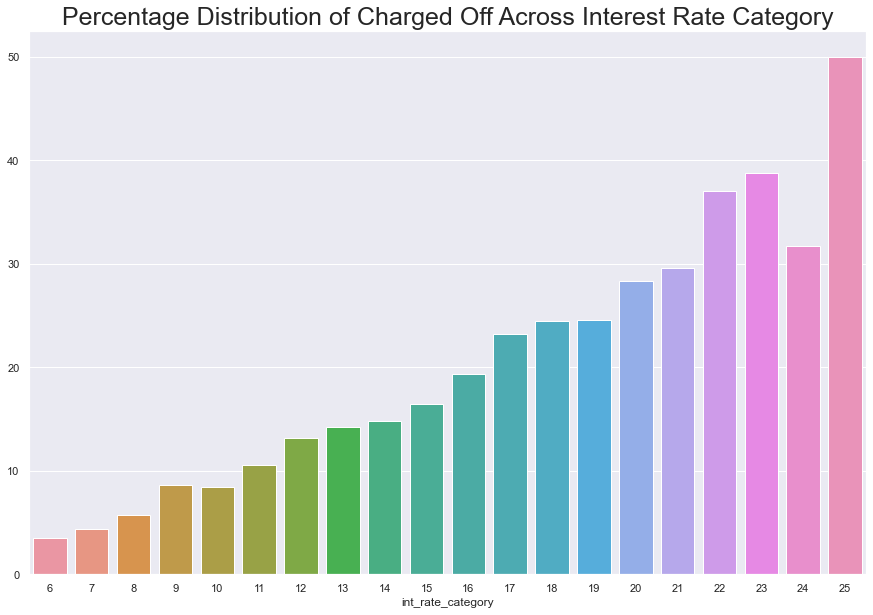

In [335]:
plot_this = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Interest Rate Category", fontdict={'fontsize': 25})
plt.show()
# plot_this

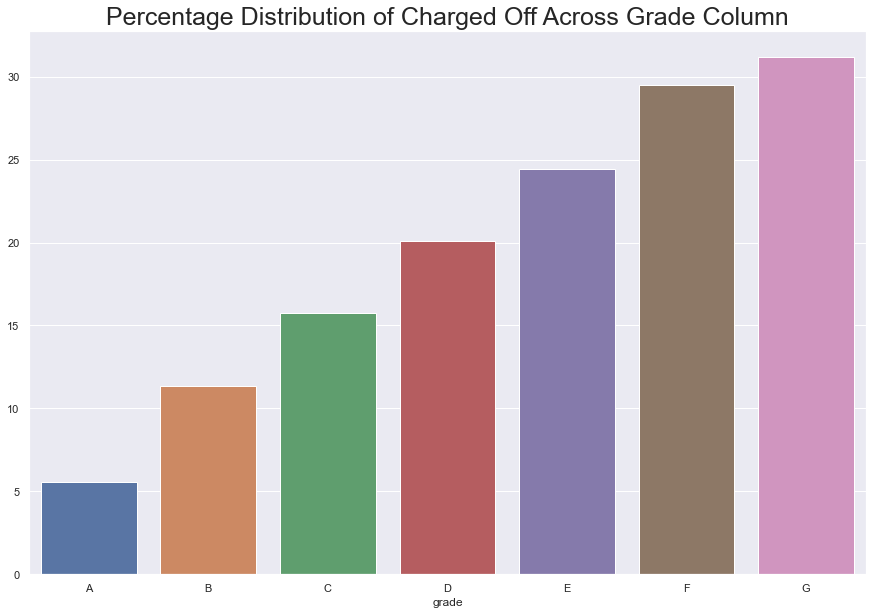

In [336]:
plot_this = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Grade Column", fontdict={'fontsize': 25})
plt.show()
# plot_this

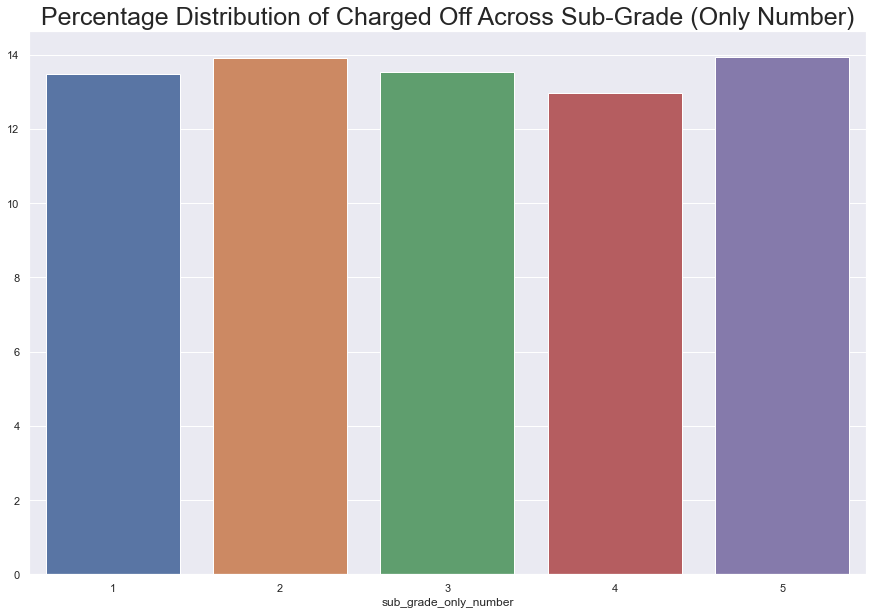

In [337]:
plot_this = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade (Only Number)", fontdict={'fontsize': 25})
plt.show()
# plot_this

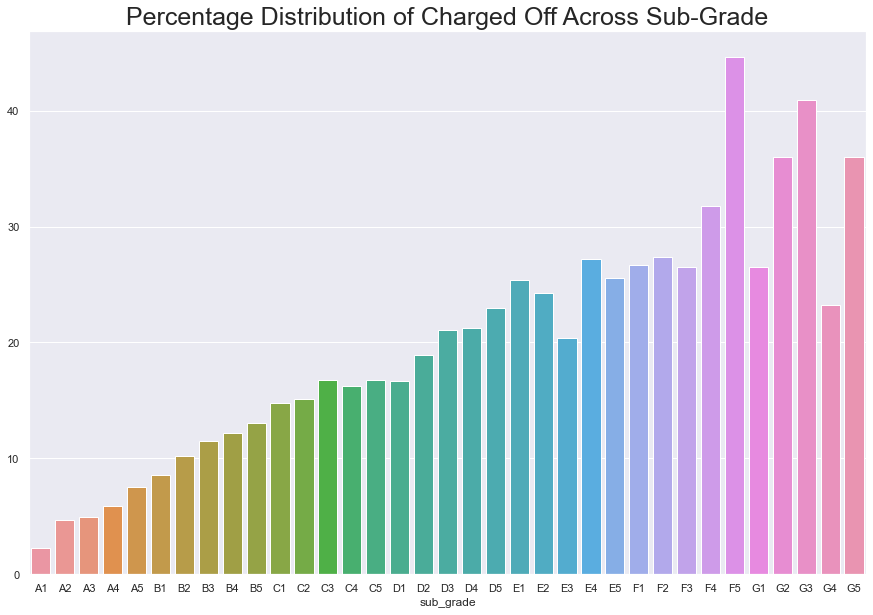

In [338]:
plot_this = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade", fontdict={'fontsize': 25})
plt.show()
# plot_this

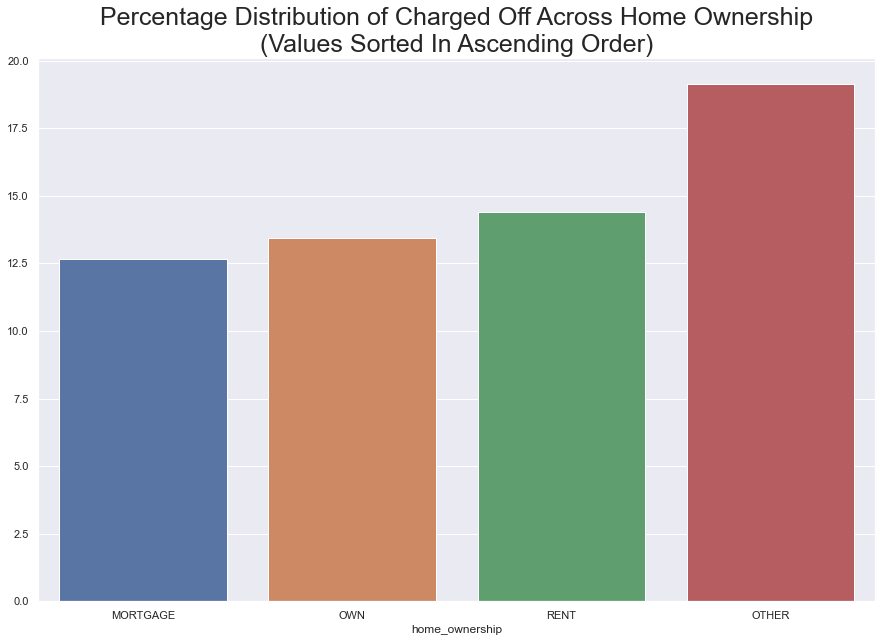

In [339]:
plot_this = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Home Ownership\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

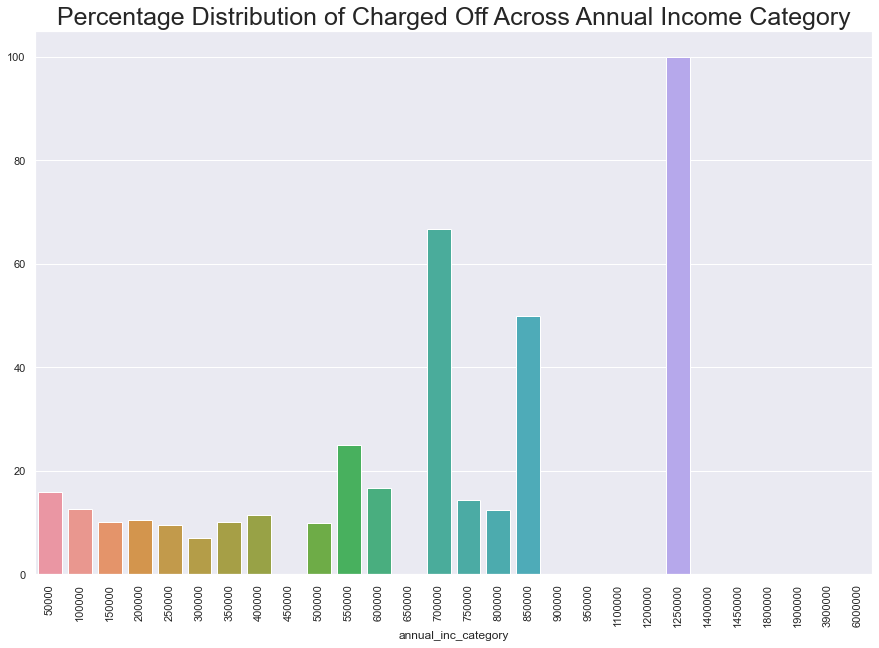

In [340]:
plot_this = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Annual Income Category", fontdict={'fontsize': 25})
plt.show()
# plot_this

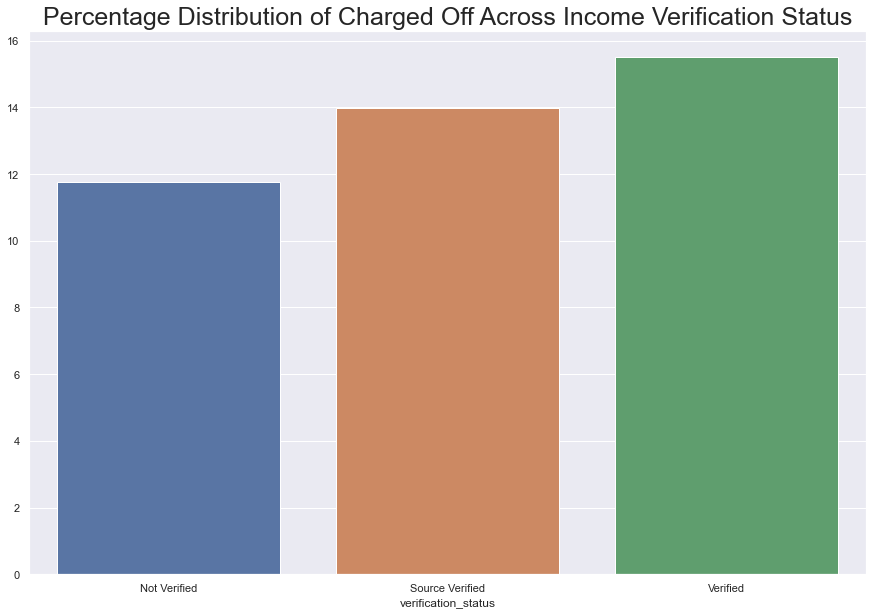

In [341]:
plot_this = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Income Verification Status", fontdict={'fontsize': 25})
plt.show()
# plot_this

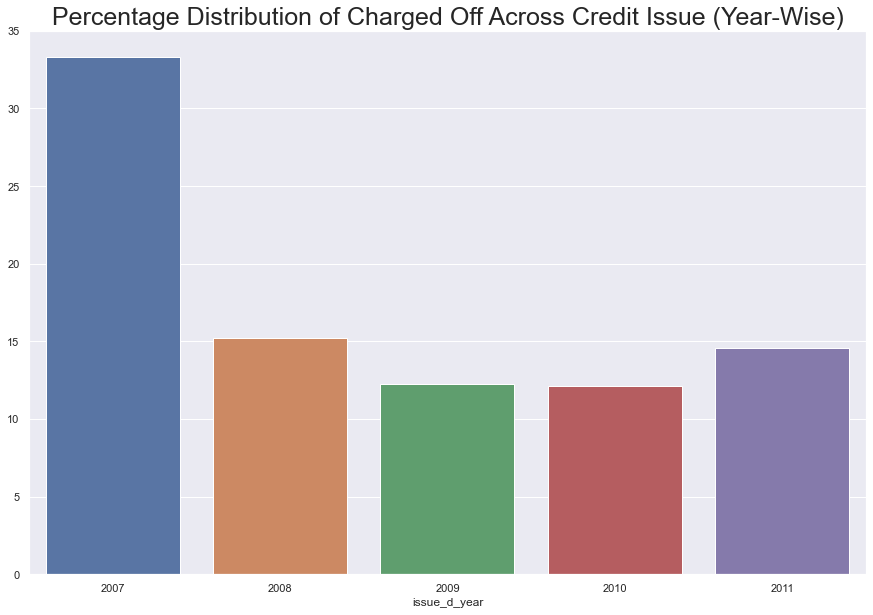

In [342]:
plot_this = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)", fontdict={'fontsize': 25})
plt.show()
# plot_this

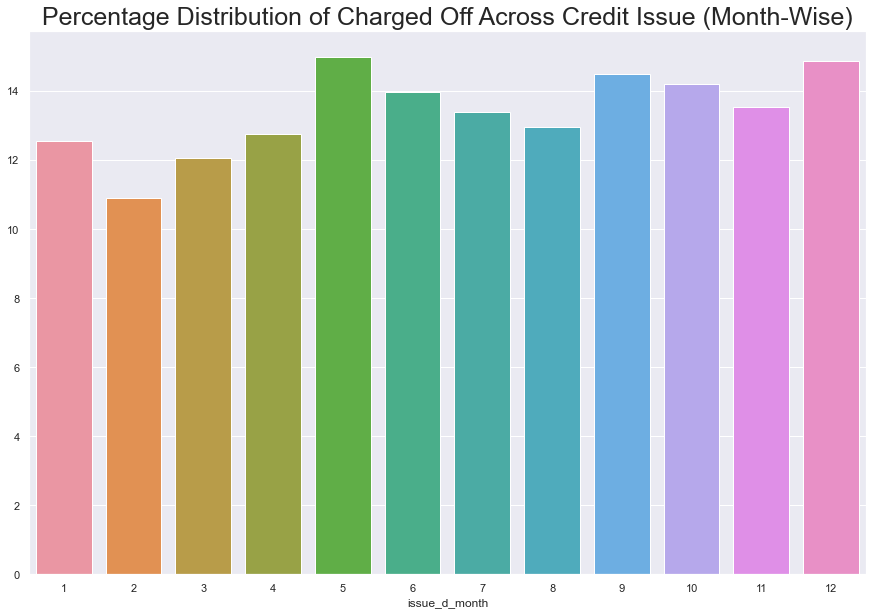

In [343]:
plot_this = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)", fontdict={'fontsize': 25})
plt.show()
# plot_this

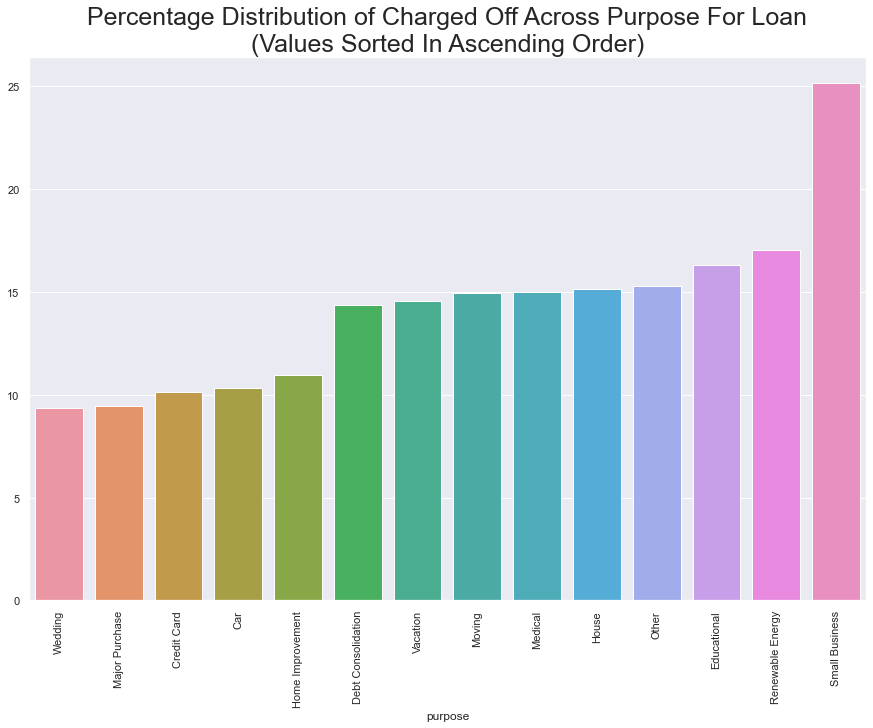

In [344]:
plot_this = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Purpose For Loan\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

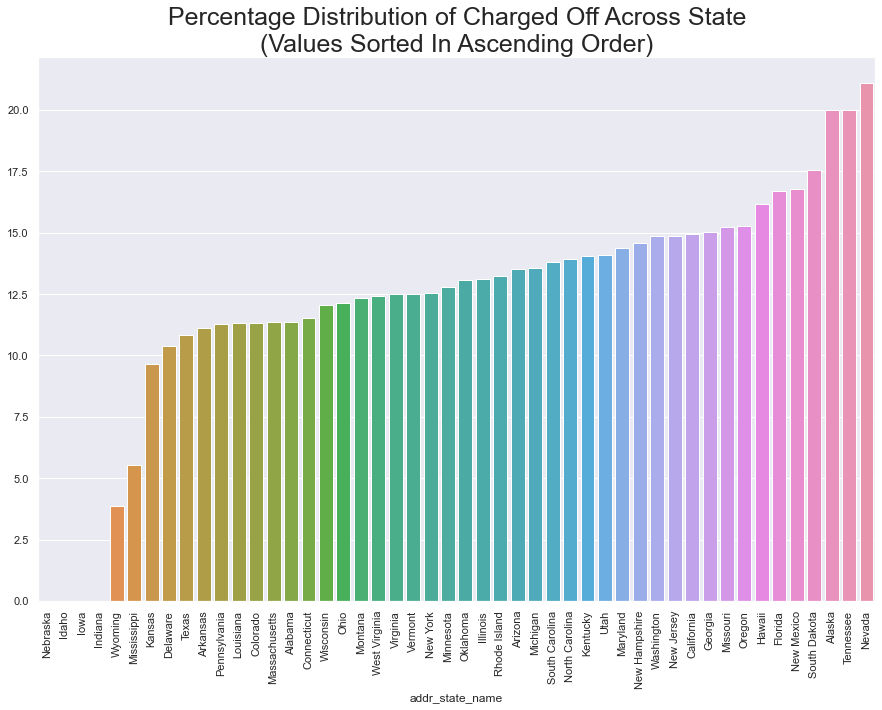

In [345]:
plot_this = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

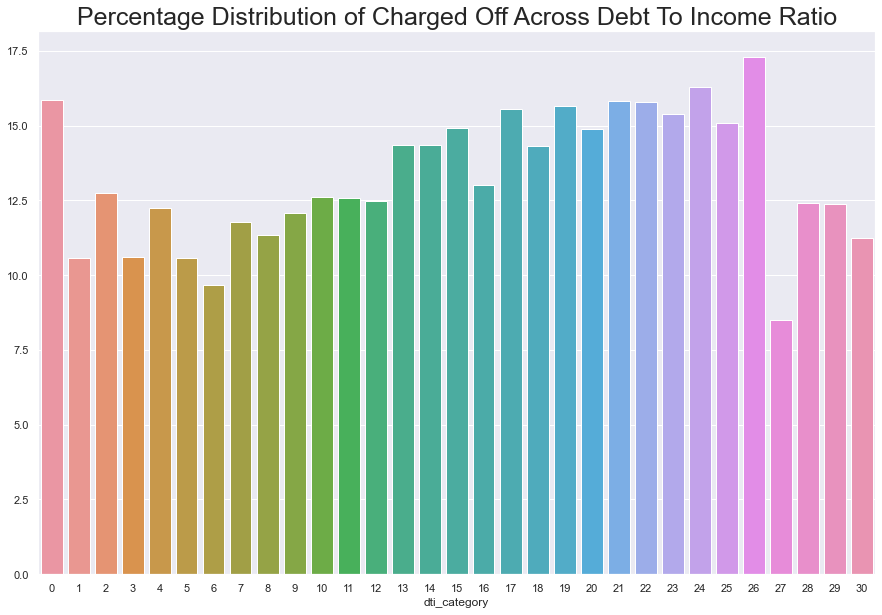

In [346]:
plot_this = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Debt To Income Ratio", fontdict={'fontsize': 25})
plt.show()
# plot_this

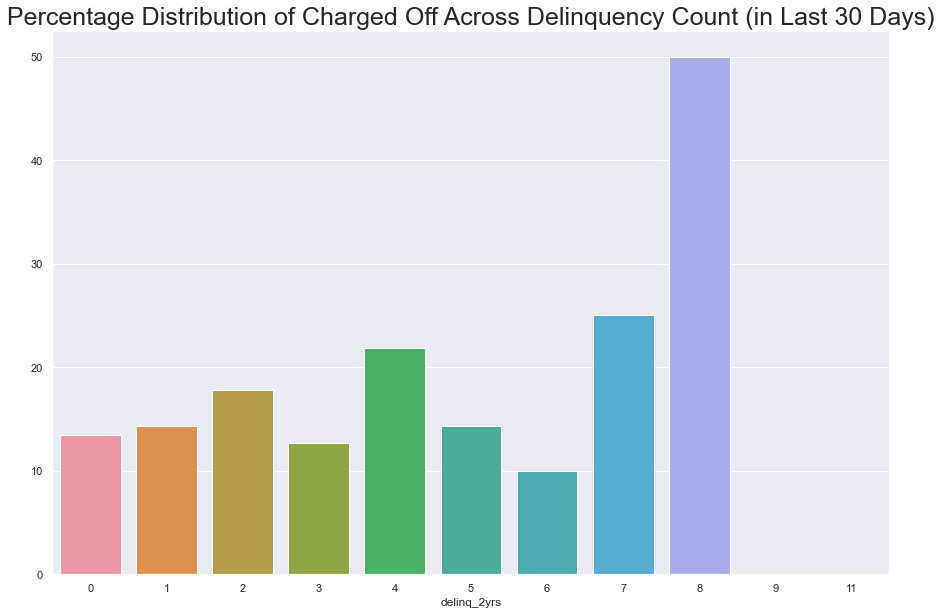

In [347]:
plot_this = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Delinquency Count (in Last 30 Days)", fontdict={'fontsize': 25})
plt.show()
# plot_this

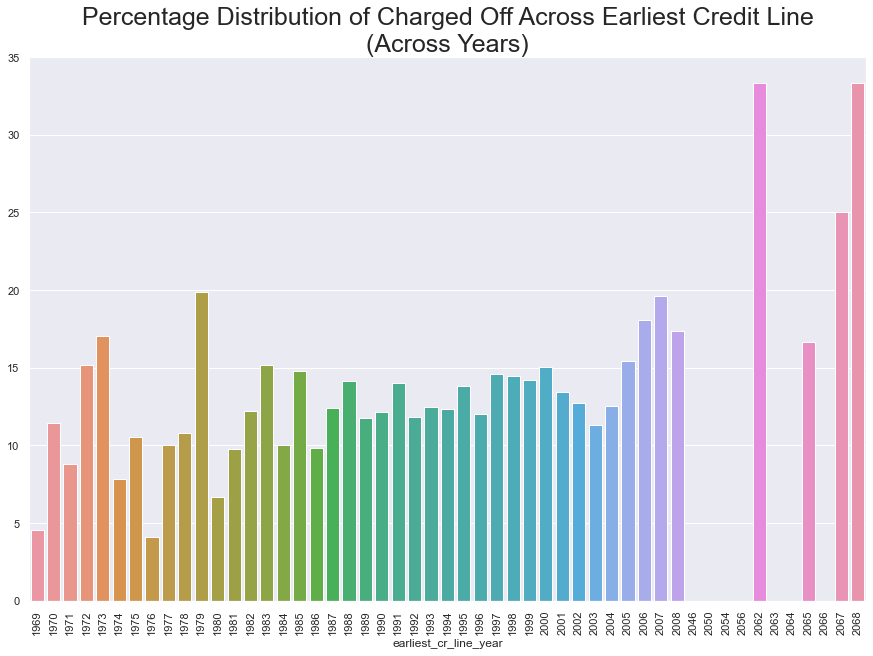

In [348]:
plot_this = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)", fontdict={'fontsize': 25})
plt.show()
# plot_this

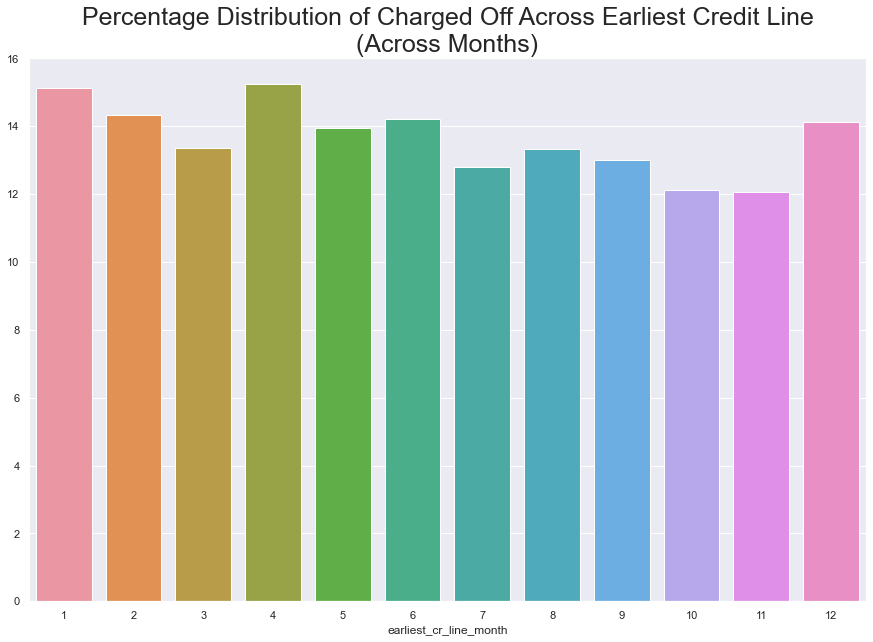

In [349]:
plot_this = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)", fontdict={'fontsize': 25})
plt.show()
# plot_this

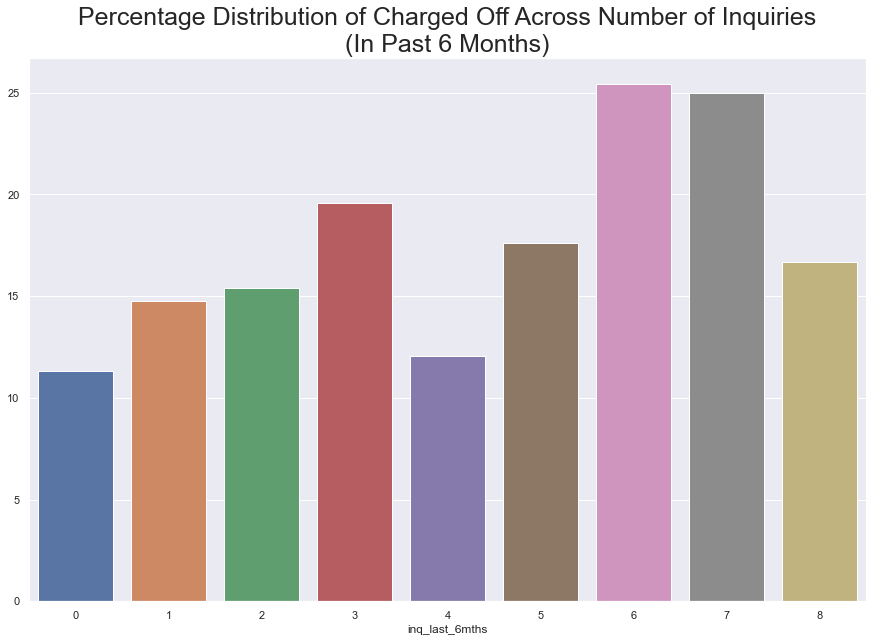

In [350]:
plot_this = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)", fontdict={'fontsize': 25})
plt.show()
# plot_this

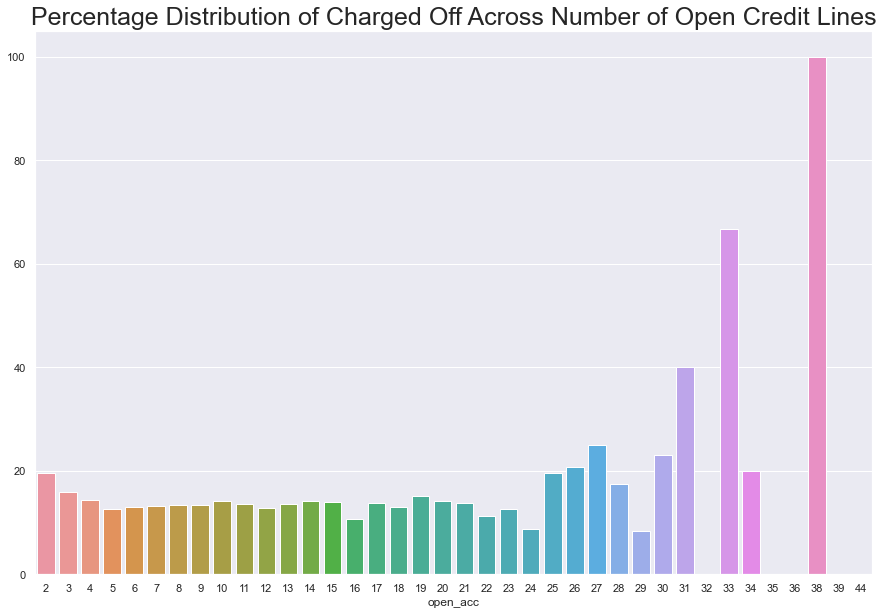

In [351]:
plot_this = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Open Credit Lines", fontdict={'fontsize': 25})
plt.show()
# plot_this

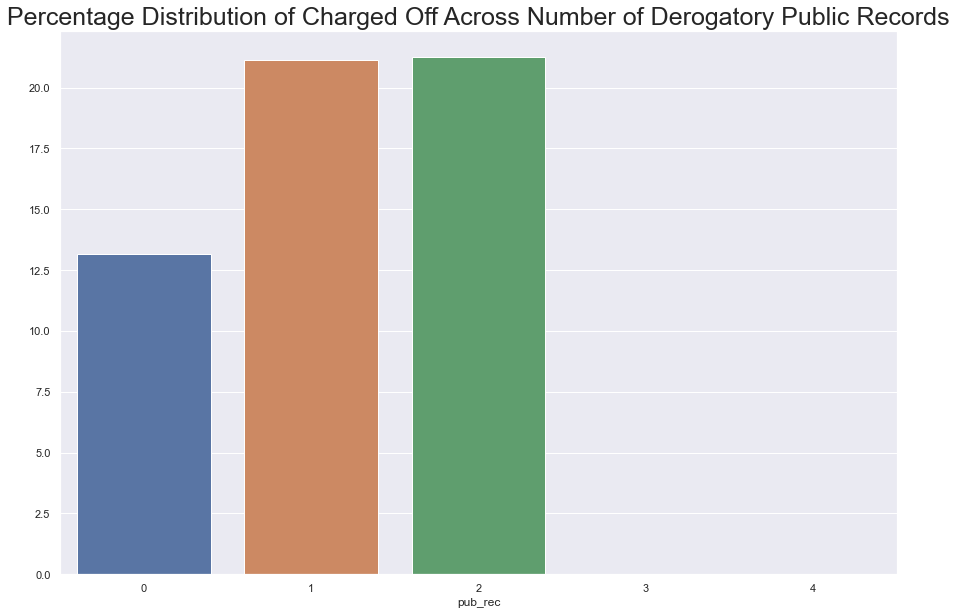

In [352]:
plot_this = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Derogatory Public Records", fontdict={'fontsize': 25})
plt.show()
# plot_this

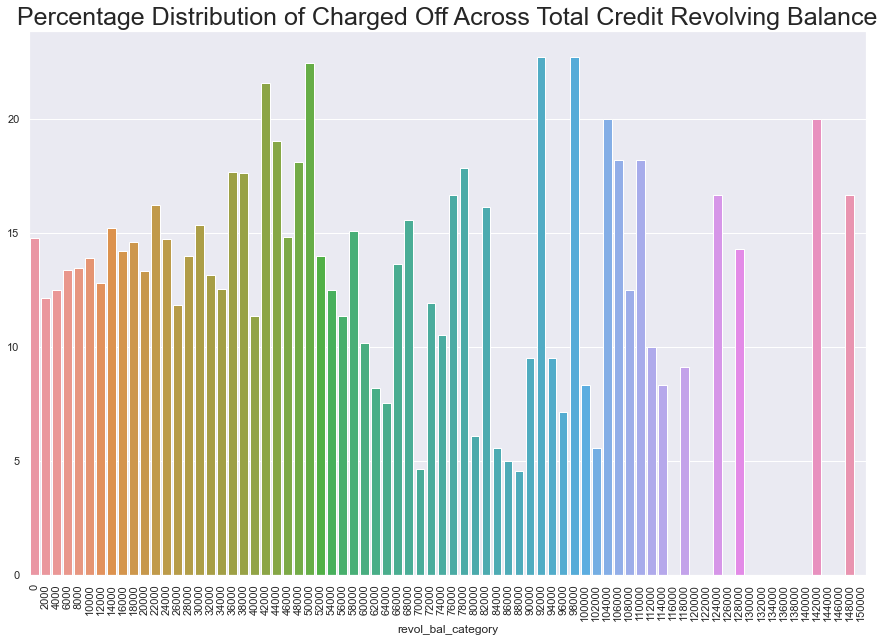

In [353]:
plot_this = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Total Credit Revolving Balance", fontdict={'fontsize': 25})
plt.show()
# plot_this

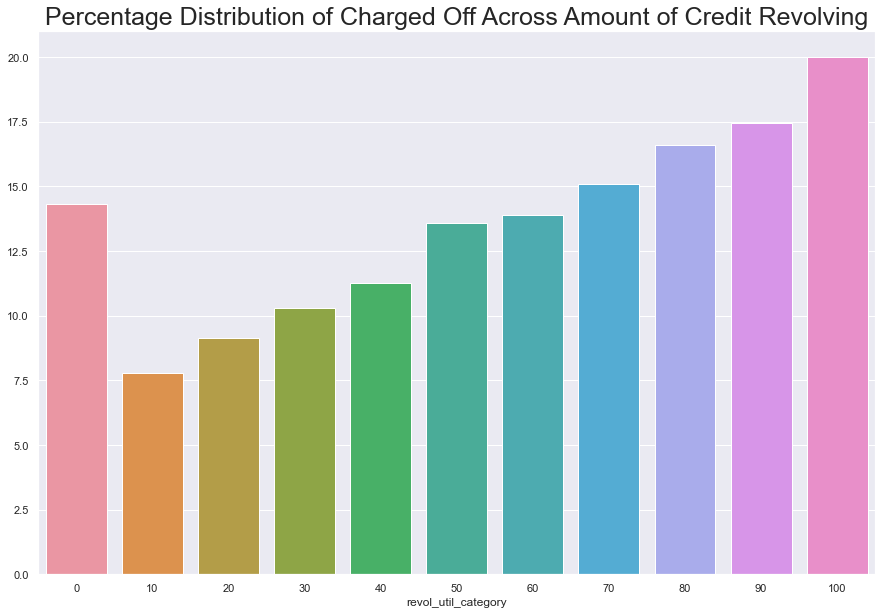

In [354]:
plot_this = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Amount of Credit Revolving", fontdict={'fontsize': 25})
plt.show()
# plot_this

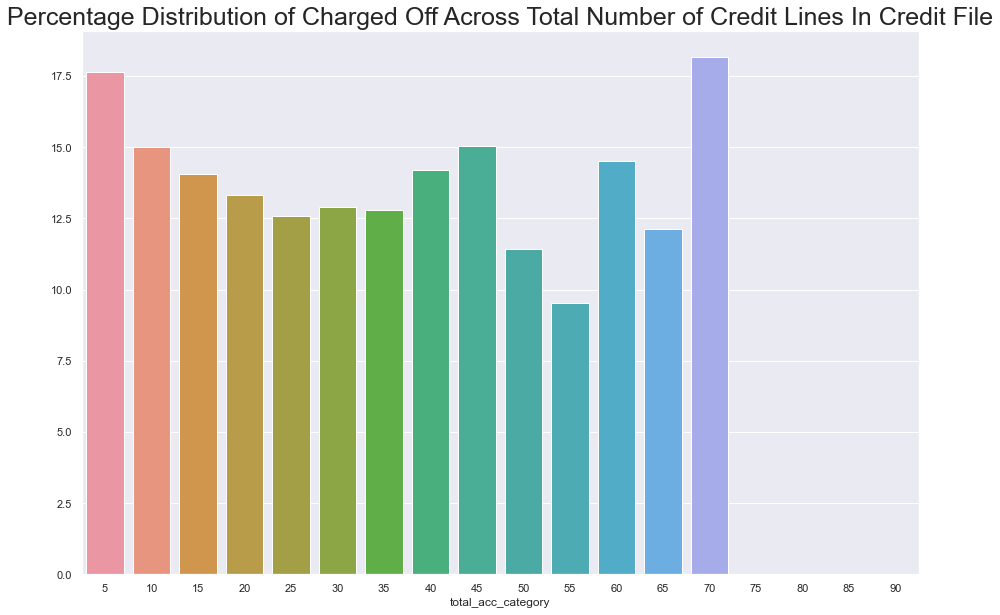

In [355]:
plot_this = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Total Number of Credit Lines In Credit File", fontdict={'fontsize': 25})
plt.show()
# plot_this

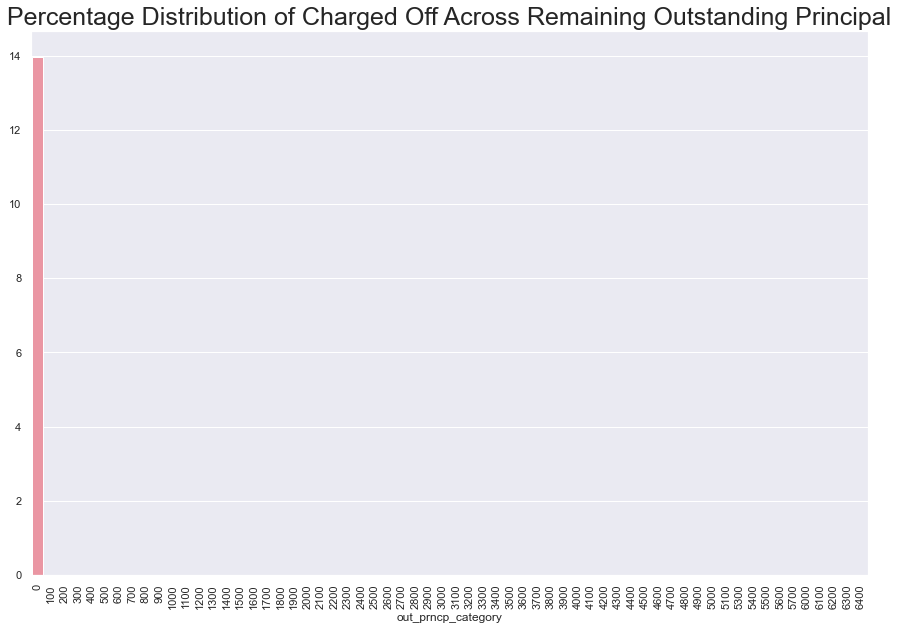

In [356]:
plot_this = raw_data.pivot_table(index='out_prncp_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Remaining Outstanding Principal", fontdict={'fontsize': 25})
plt.show()
# plot_this

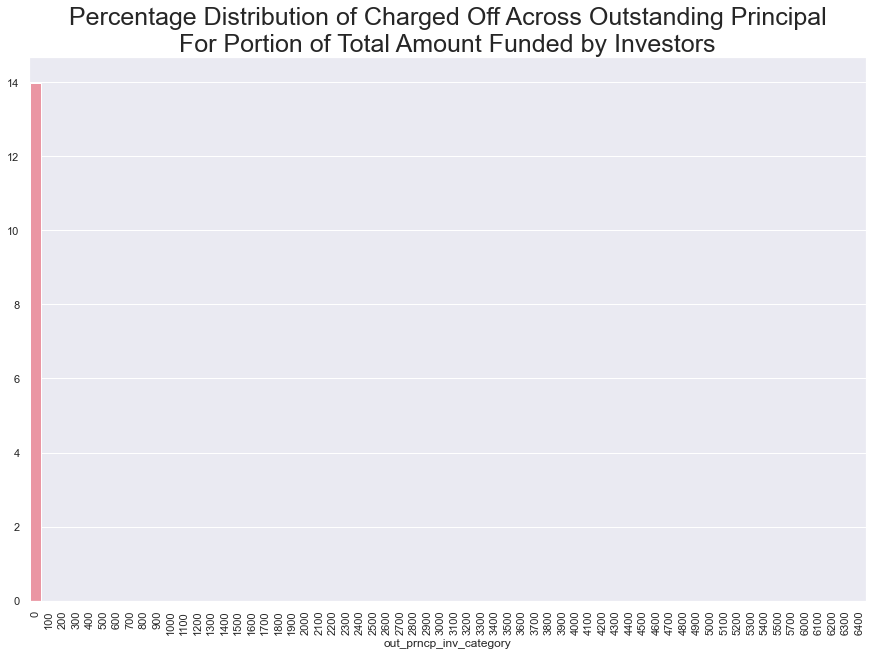

In [357]:
plot_this = raw_data.pivot_table(index='out_prncp_inv_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Outstanding Principal\nFor Portion of Total Amount Funded by Investors", fontdict={'fontsize': 25})
plt.show()
# plot_this

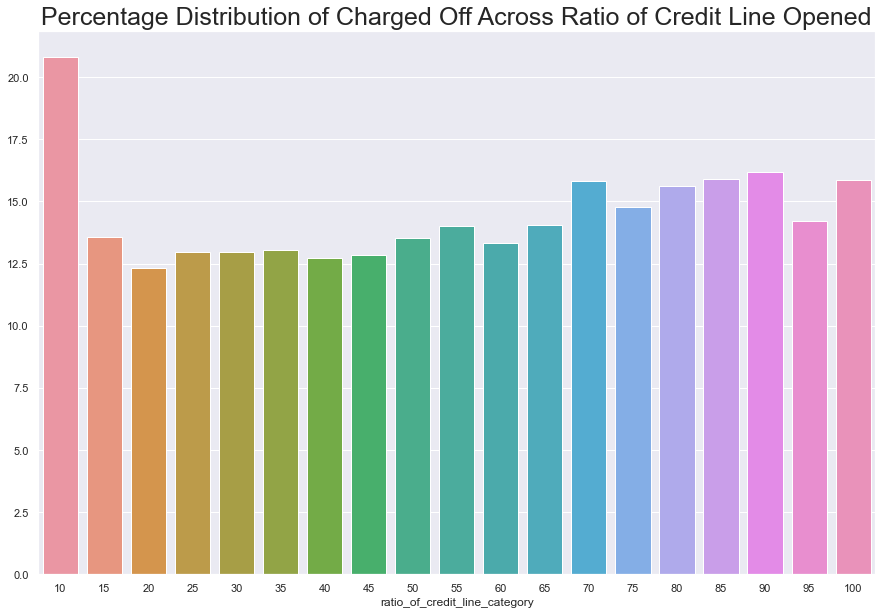

In [358]:
plot_this = raw_data.pivot_table(index='ratio_of_credit_line_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Ratio of Credit Line Opened", fontdict={'fontsize': 25})
plt.show()
# plot_this